# Advances Visualization

### Exploring Dataset with Pandas and Matplotlib

In [102]:
!pip install Pillow

In [103]:
!pip install wordcloud

In [104]:
!pip install seaborn

In [105]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

In [106]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [107]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [108]:
print(df_can.shape)

(195, 43)


In [109]:
print(df_can.columns)

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')


In [110]:
# Menghapus kolom yang tidak digunakan
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], 
            axis=1, inplace=True)

In [111]:
# Mengganti nama kolom
df_can.rename(columns = {'OdName' : 'Country',
                         'AreaName' : 'Continent', 
                         'RegName' : 'Region'},
                         inplace = True)

In [112]:
# Membuat kolom bertipe string
df_can.columns = list(map(str, df_can.columns))

In [113]:
# Mengubah country menjadi index
df_can.set_index('Country', inplace = True)

In [114]:
# Membuat variabel years dengan list string 1980 - 2014
years = list(map(str, range(1980, 2014))) 
print('Data dimensions : ', df_can.shape)

Data dimensions :  (195, 37)


In [115]:
# Menambahkan kolom 'Total'
df_can['Total'] = df_can[years].sum(axis=1)

In [116]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### Visualizing Data using Matplotlib

In [117]:
%matplotlib inline

mpl.style.use('ggplot')
print('Matplotlib version : ', mpl.__version__)

Matplotlib version :  3.7.2


### Waffle Chart
Waffle chart biasanya dibuat untuk menampilkan progres menuju tujuan

In [118]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [119]:
# Step 1 : menentukan proporsi setiap kategori sehubungan dengan total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) 
                        for value in df_dsn['Total']]
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [120]:
# Step 2 : menentukan ukuran keseluruhan waffle chart
width = 40
height = 10

total_num_tiles = width * height
print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [121]:
# Step 3 : menggunakan jumlah proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori
tiles_per_category = [round(proportion * total_num_tiles)
                      for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [122]:
# Step 4 : membuat matriks mengerupai waffle
waffle_chart = np.zeros((height, width))
category_index = 0
tile_index = 0

for col in range(width) :
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
        
print('Waffle chart populated!')

Waffle chart populated!


In [123]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

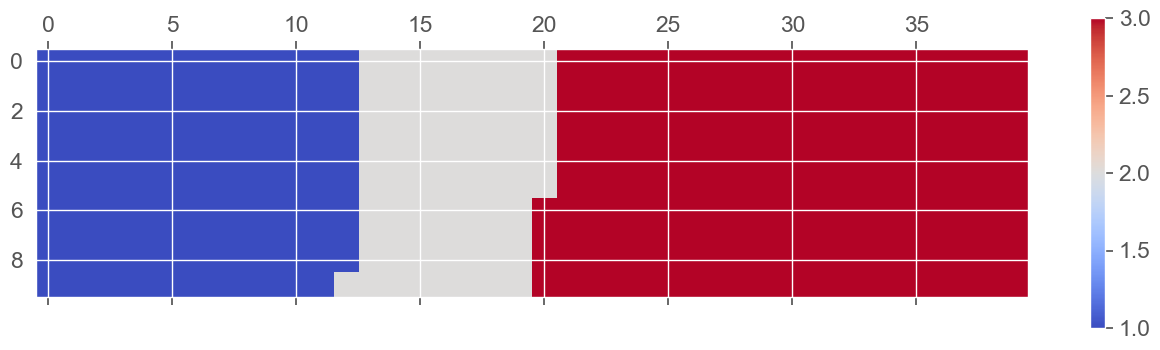

In [124]:
# Step 5 : memetakan matriks waffle chart menjadi visual
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

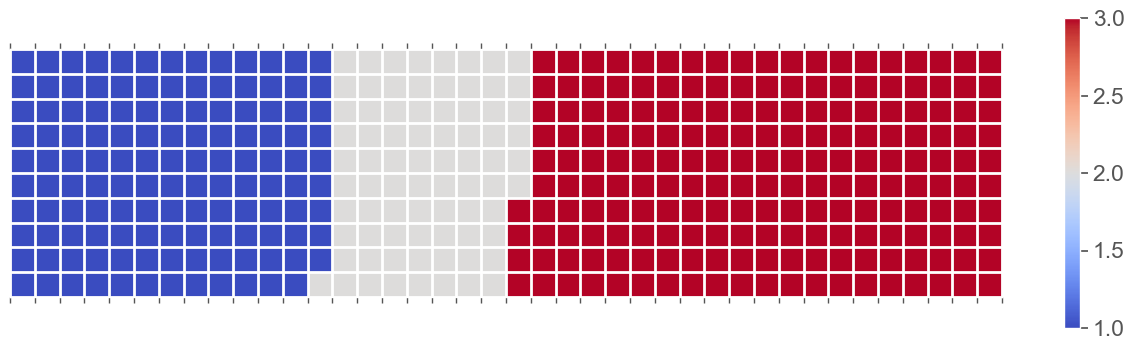

In [125]:
# Setep 6 : Mempercantik chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

C:\Users\Acer\AppData\Local\Temp\ipykernel_8796\6676320.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\Acer\AppData\Local\Temp\ipykernel_8796\6676320.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
C:\Users\Acer\AppData\Local\Temp\ipykernel_8796\6676320.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

<Figure size 640x480 with 0 Axes>

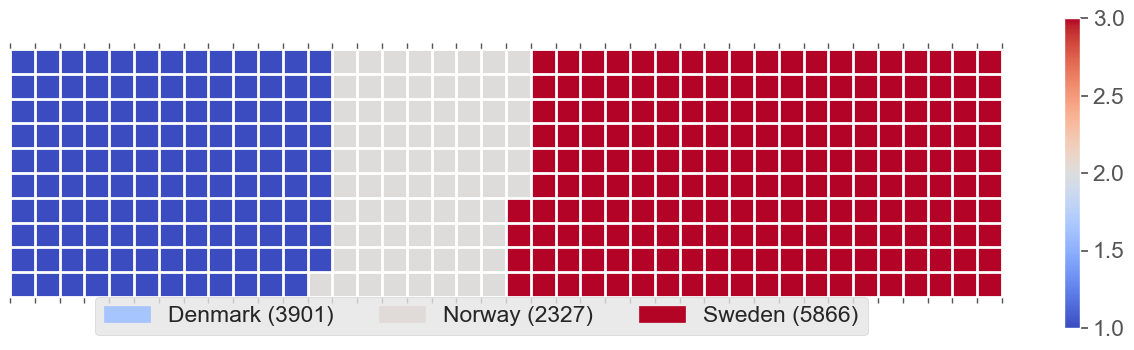

In [126]:
# Step 7 : menambahkan legend

# inisiasi objek baru
fig = plt.figure()

# display waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# mendapatkan axis
ax = plt.gca()

# membuat minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# menambahkan gridlines based pada minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# menghitung sum kumulatif masing-masing kategori sesuai warna diantara chart dan legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# membuat legend 
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')' 
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# menambahkan legend ke chart
plt.legend(handles = legend_handles, loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))

### Word Clouds 
Word clouds juga dikenal sebagai text clouds atau tag clouds yang bekerja dengan cara menjadikan kata tertentu lebih besar dan tebal ketika kata tersebut banyak muncul di kata cloud.

In [127]:
with open('Dataset/alice_novel.txt', 'r') as file:
    alice_novel = file.read()

In [128]:
stopword = set(STOPWORDS)

In [129]:
# membuat word cloud dengan 2000 kata pertama dalam novel
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     stopwords=stopword)
alice_wc.generate(alice_novel)

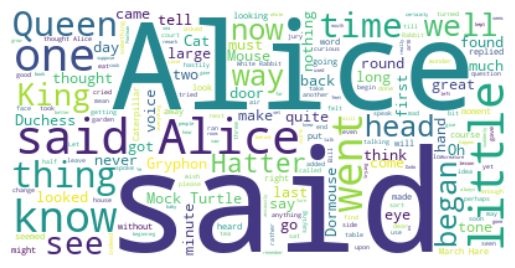

In [130]:
# memvisualisasikan word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<b>Insight :</b> Berdasarkan visualisasi, kata yang paling umum dari 2000 kata pertama dalam alice_novel adalah kata <b>Alice, said, little, went,</b> dan seterusnya.

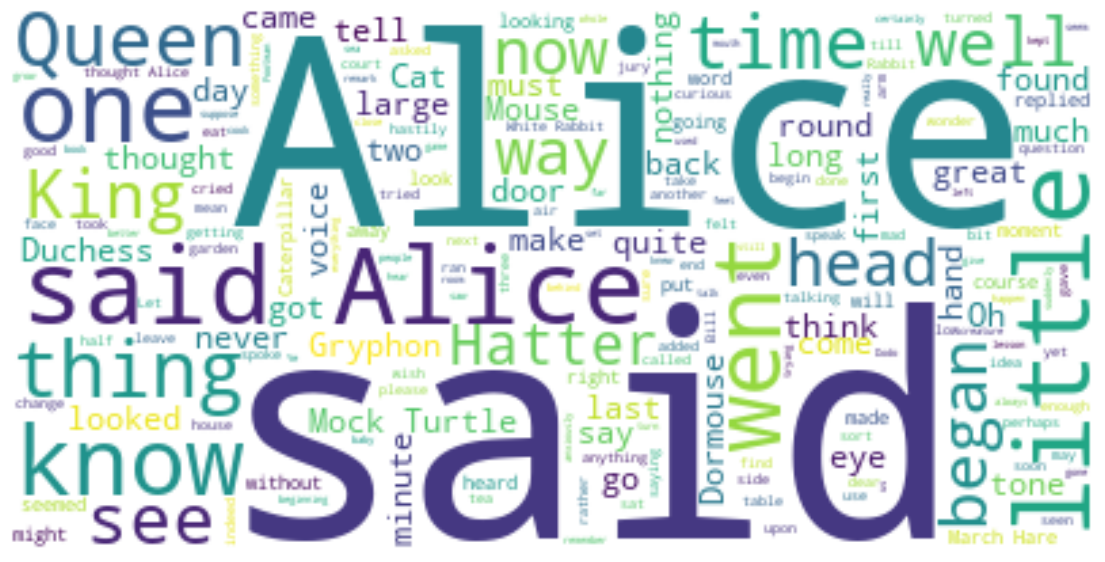

In [131]:
# mengganti ukuran visual
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

*said* bukanlah kata yang informatif sehingga perlu ditambahkan ke stopwords dan membuat ulang cloud.

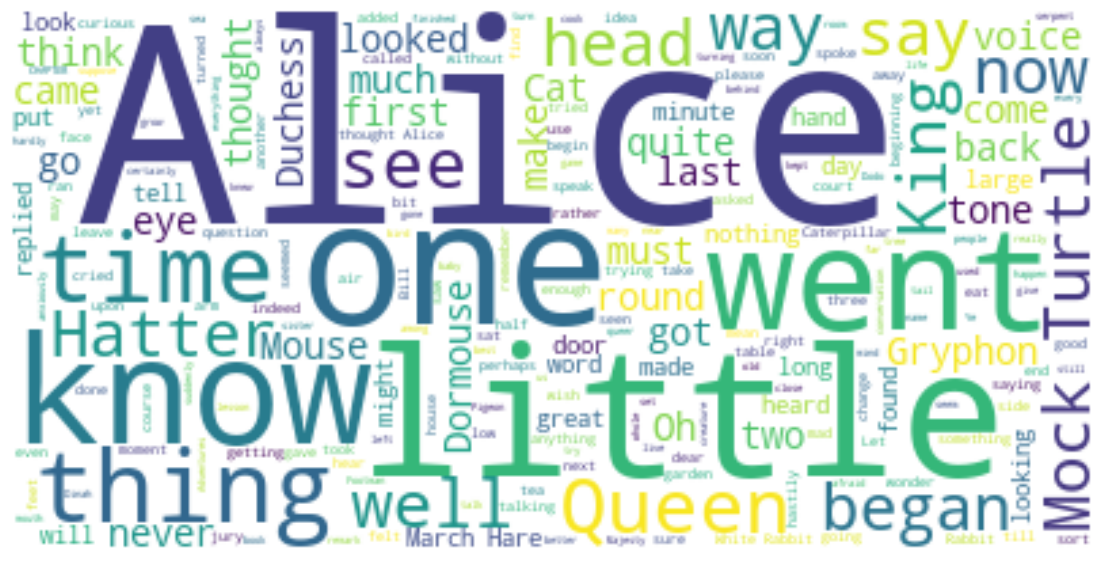

In [132]:
stopword.add('said')
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [133]:
alice_mask = np.array(Image.open('Dataset/alice_mask.png'))

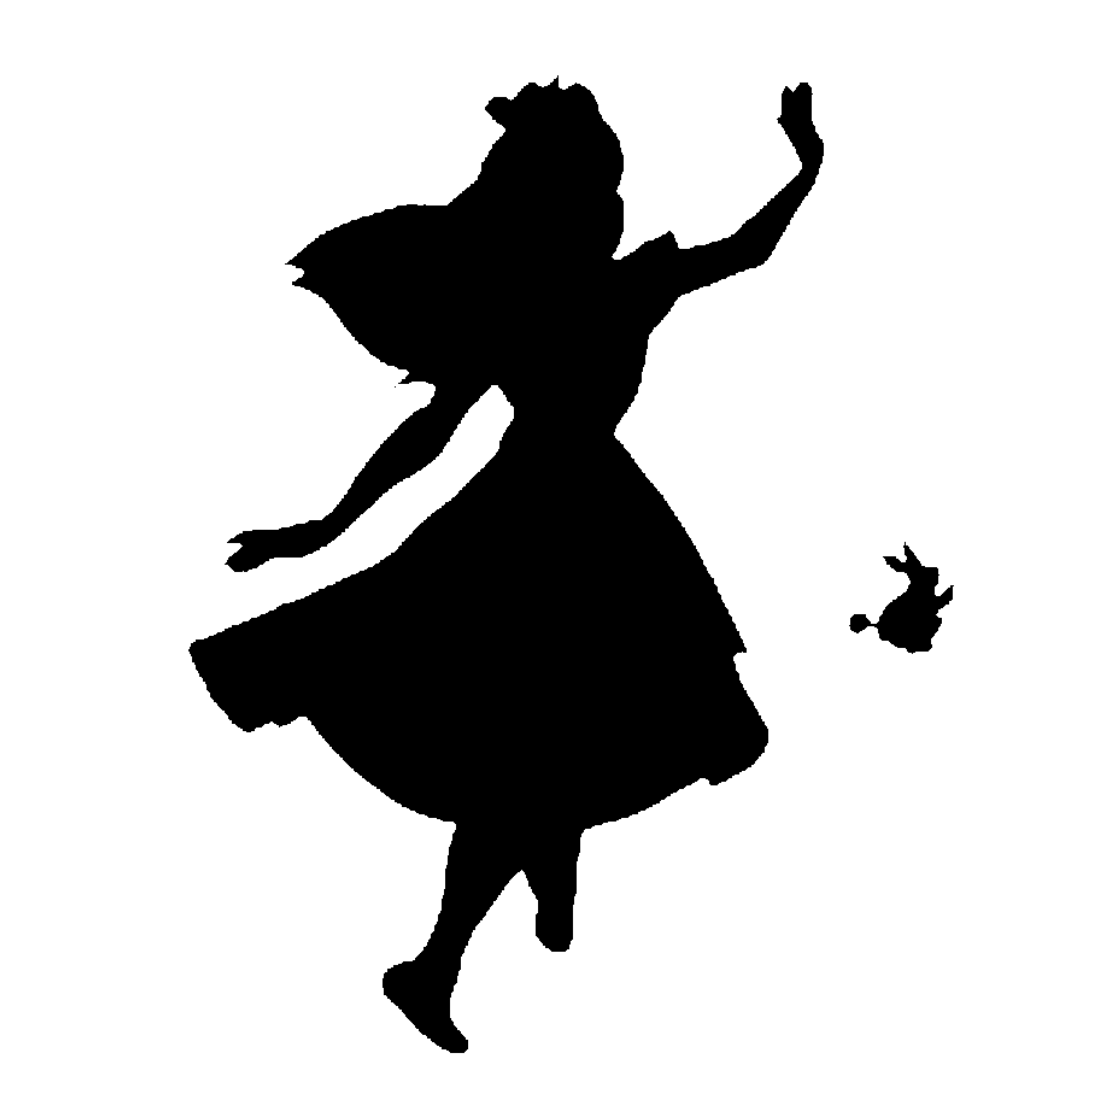

In [134]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

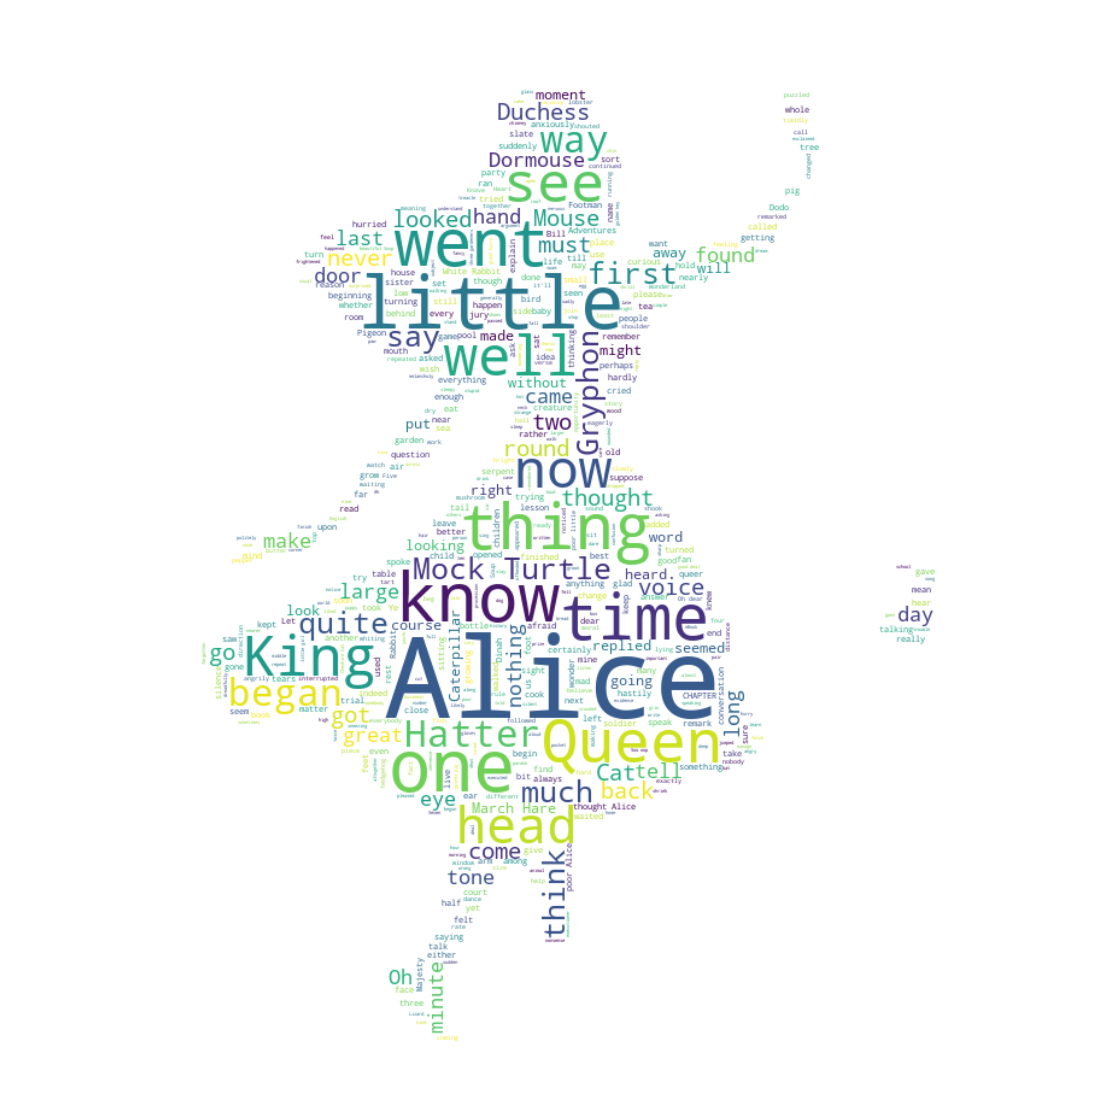

In [135]:
# Membentuk word cloud sesuai masking
alice_wc = WordCloud(background_color='white', max_words=2000,
                     mask=alice_mask, stopwords=stopword)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### word cloud pada data Canada 

In [136]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [137]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [138]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/
                               float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
word_string
        

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [139]:
# membuat wordcloud
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word Cloud created!')

Word Cloud created!


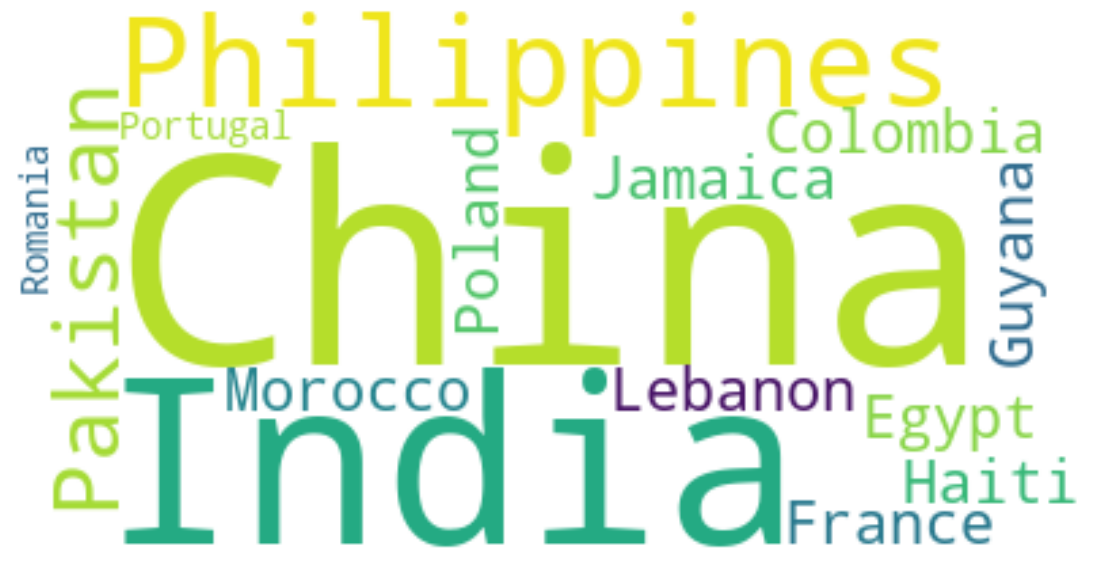

In [140]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plots

In [141]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


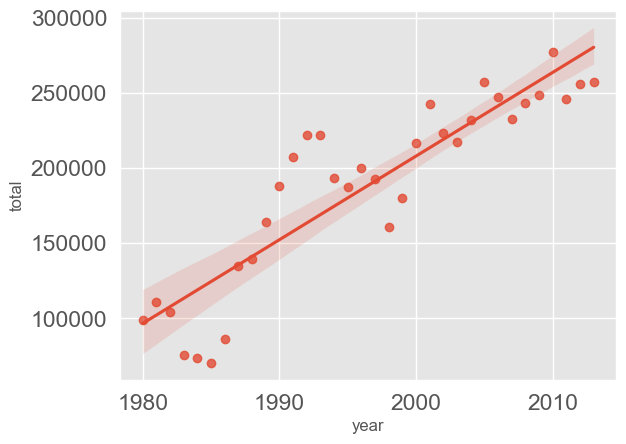

In [142]:
# memanggil fungsi regresi
ax = sns.regplot(x='year', y='total', data=df_tot)

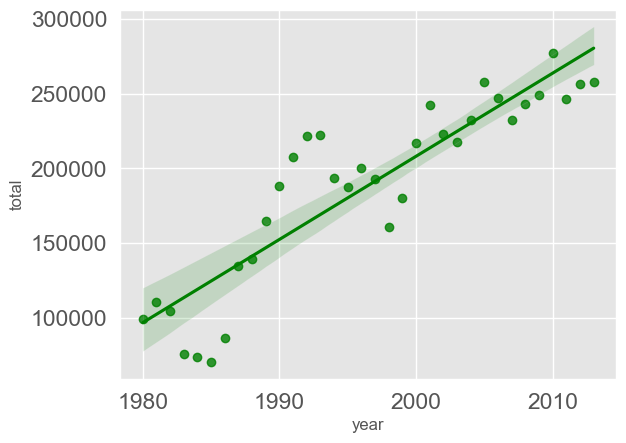

In [143]:
# mengubah warna plot
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

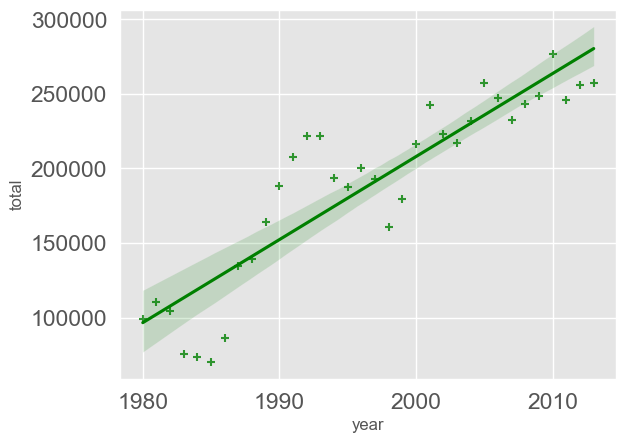

In [144]:
# mengubah bentuk marker pada plot
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

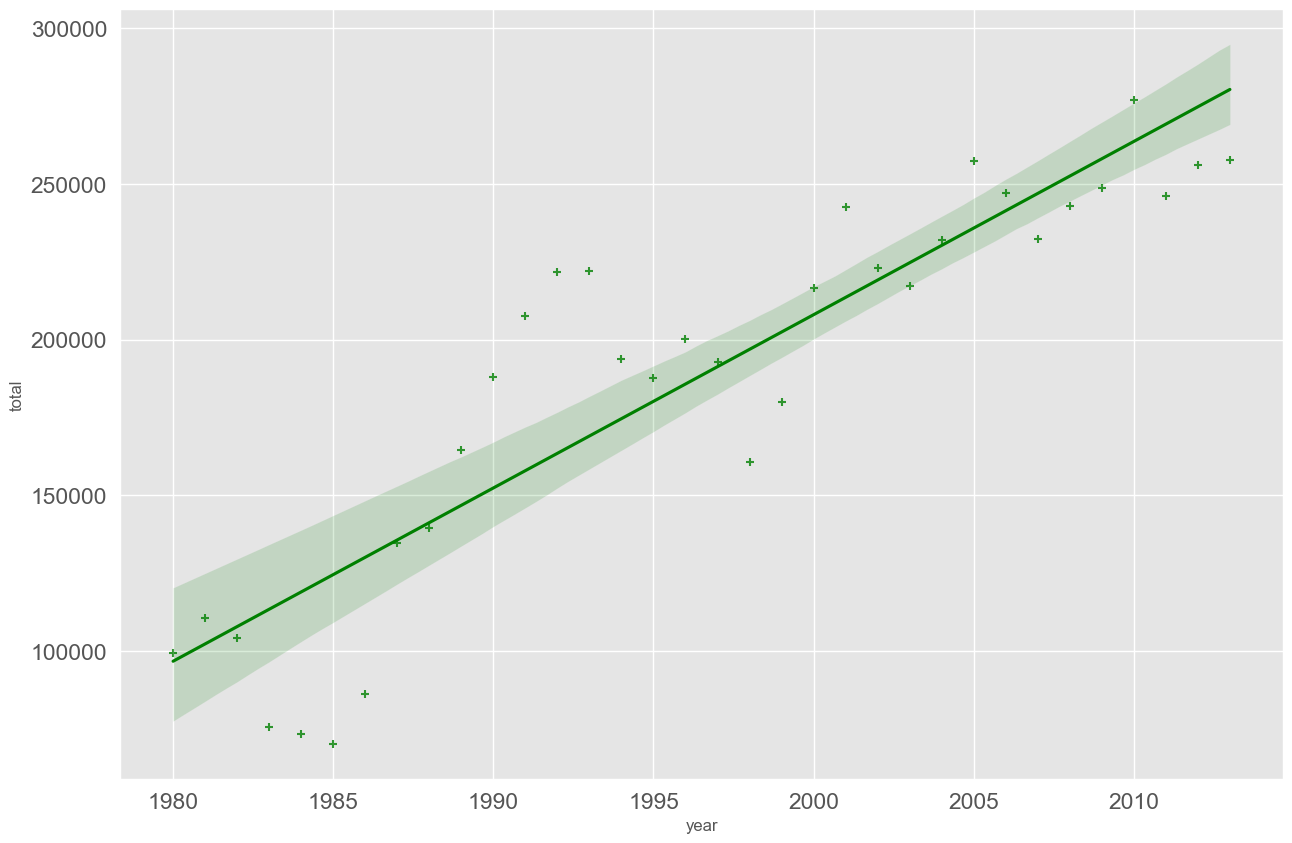

In [145]:
# mengubah ukuran plot
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

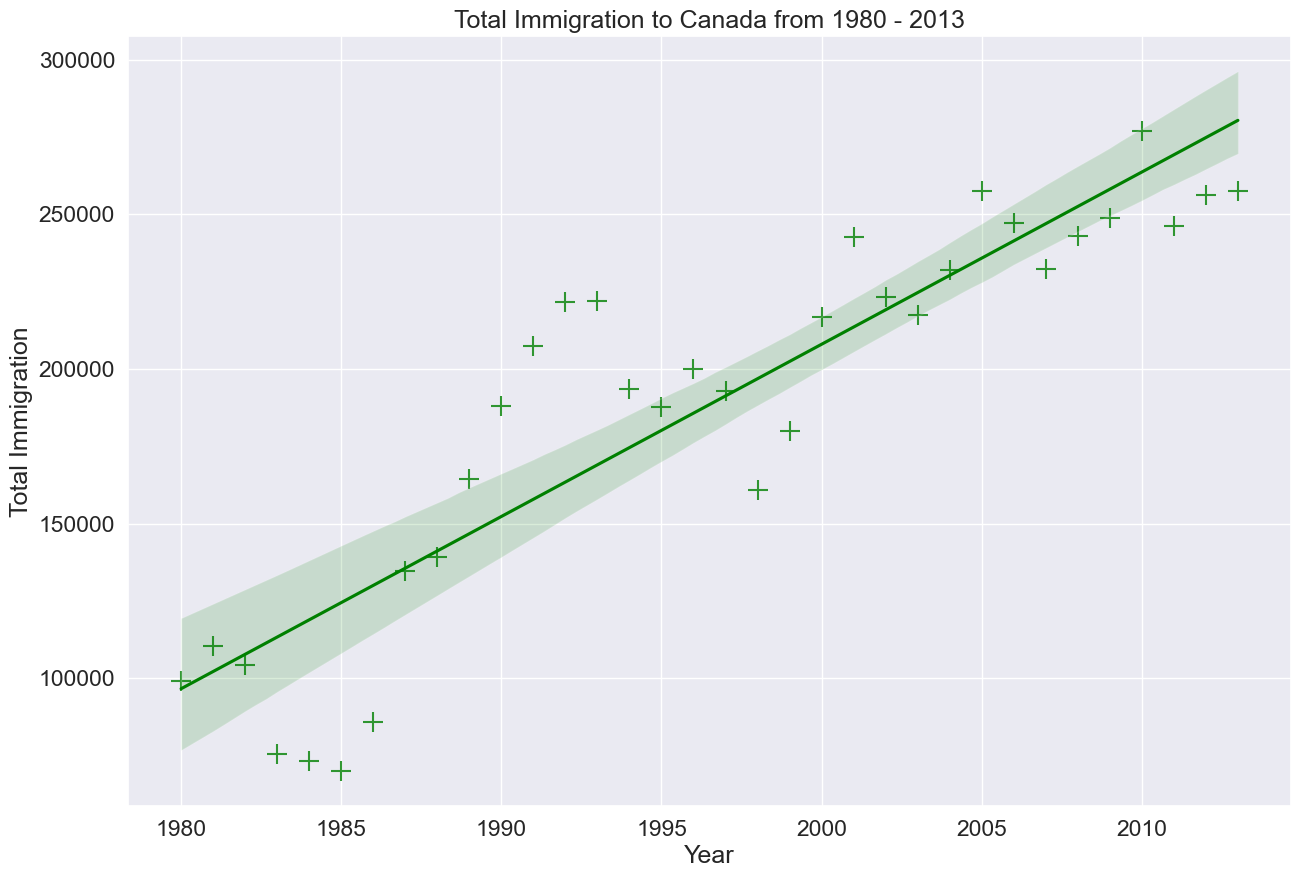

In [146]:
# mengubah ukuran marker dan memberikan label
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', 
                 marker='+', scatter_kws={'s' : 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

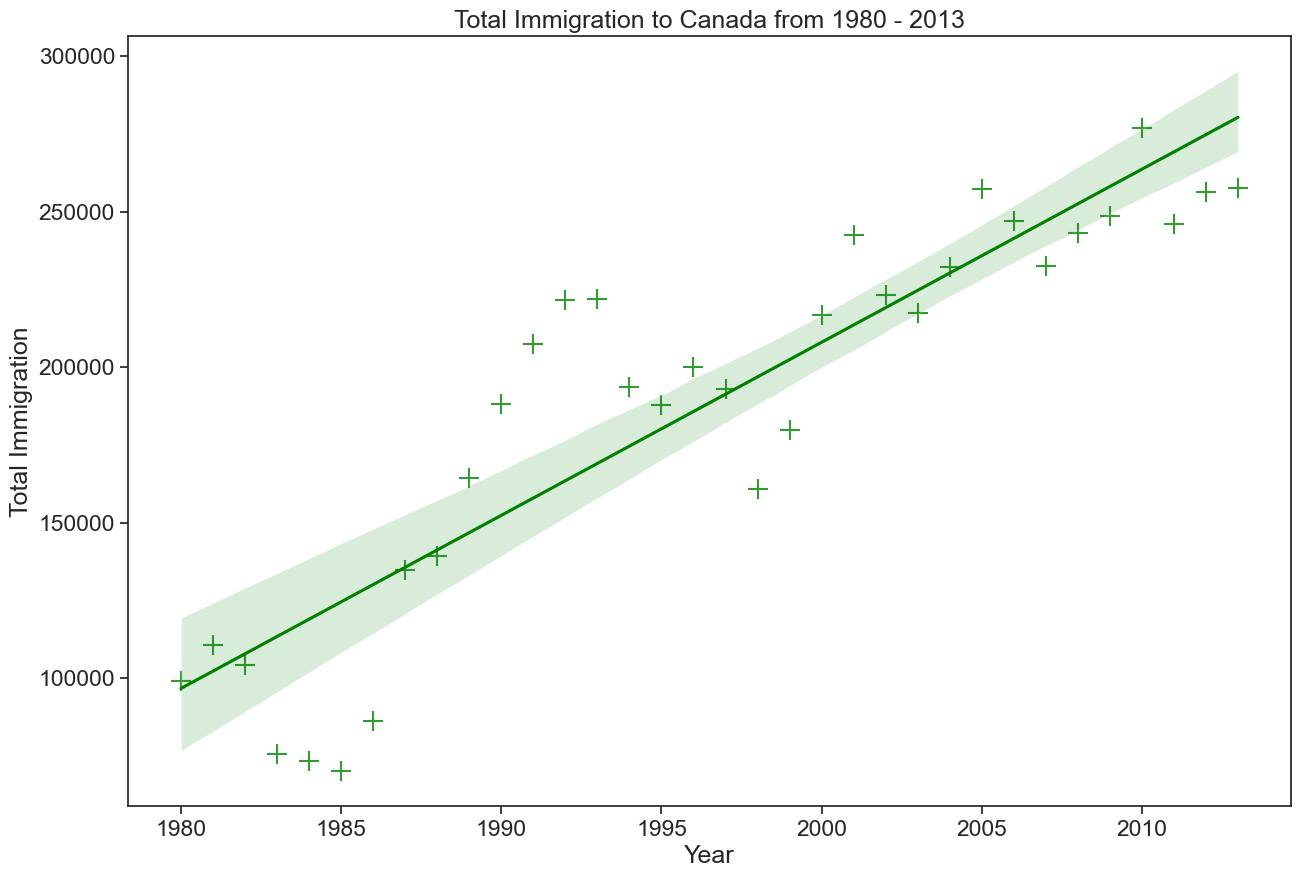

In [147]:
# mengubah ukuran marker dan memberikan label
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', 
                 marker='+', scatter_kws={'s' : 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

<b>Studi Kasus :</b> gunakan *seaborn* untuk membuat scatter plot dengan regresi line untuk memvisualisasikan total imigrasi dari Denmark, Sweden, and Norway ke Canada dari 1980 - 2013

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

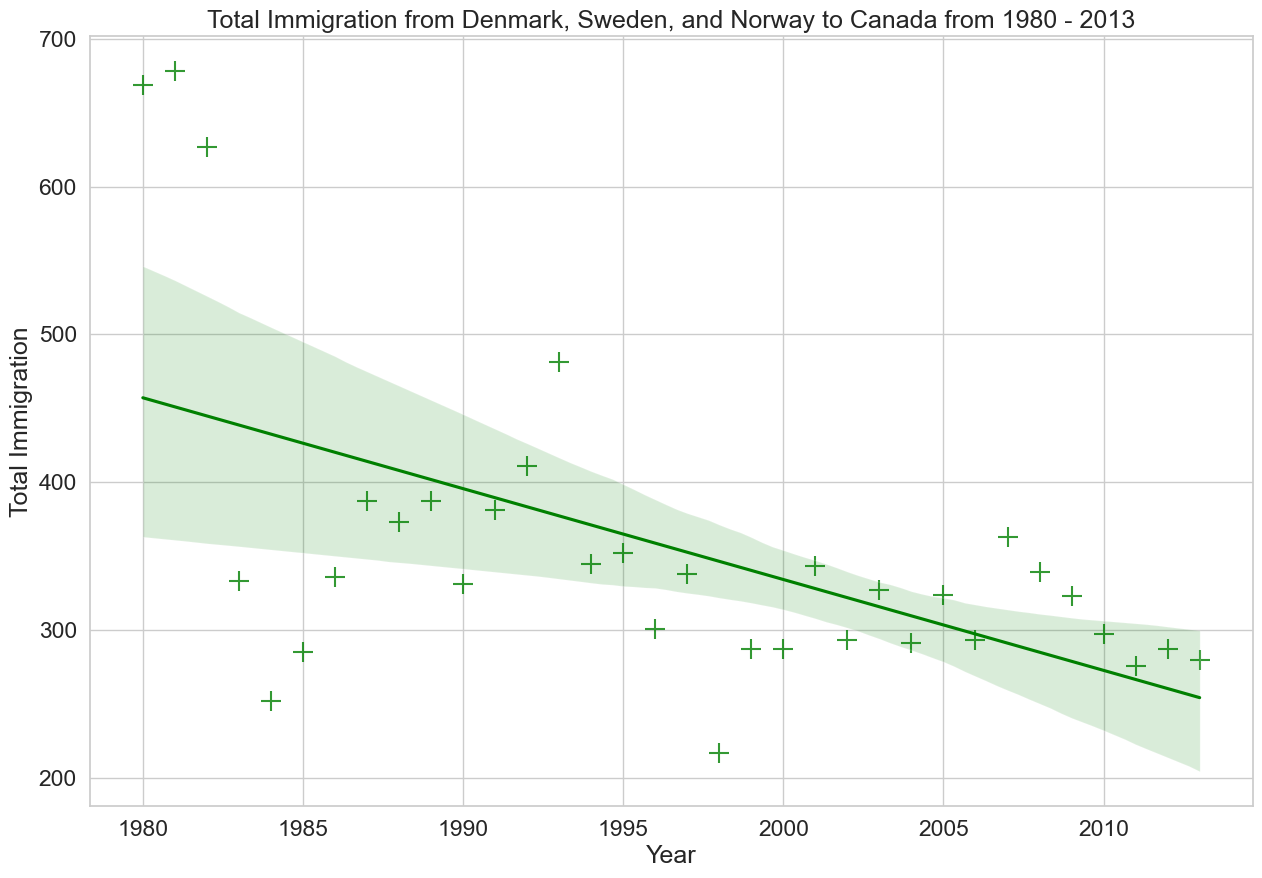

In [148]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', 
                 marker='+', scatter_kws={'s' : 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')


# Advances Visualization 2 

### Intoduction to Folium
Folium adalah pustaka Python yang dapat membantu membuat beberapa jenis peta Leaflet

In [149]:
!pip install folium

In [150]:
import folium
from folium import plugins

print('Folium installed and imported!')

Folium installed and imported!


In [151]:
# Membuat peta dunia 
world_map = folium.Map()
world_map

In [152]:
# Membuat peta yang berpusat di sekitar Semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)
world_map

<b>Studi Kasus :</b> Buat map Hacktiv8 dengan zoom level = 15

In [153]:
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
world_map

### Stamen Toner Maps
-> Peta B+W (hitam dan putih) dengan kontras tinggi, cocok untuk data mashup dan menjelajahi kelokan sungai (*river meanders zone*) dan pesisir (*coastal zone*)

In [154]:
world_map = folium.Map(location=[-6.9902851, 110.4207485], 
                       zoom_start=13, tiles='Stamen Toner')
world_map

### Stamen Terrain Maps
-> Peta yang menampilkan bayangan bukit dan warna vegetasi alam, cocok untuk menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur

In [155]:
world_map = folium.Map(location=[-6.9902851, 110.4207485], 
                       zoom_start=13, tiles='Stamen Terrain')
world_map

### Maps with Marker

In [156]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [157]:
df_incidents.shape

(150500, 13)

Jadi, data frame terdiri dari 150.500 kejahatan yang terjadi pada 2016. Untuk mengurangi *computional cost*, kita hanya akan bekerja pada 100 insiden pertama

In [158]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [159]:
df_incidents.shape

(100, 13)

#### Visualisasi kejahatan di San Francisco

In [160]:
# Nilai Latitude dan Longtitude San Francisco
latitude = 37.77
longtitude = -122.42

sanfran_map = folium.Map(location=[latitude, longtitude], zoom_start=12)
sanfran_map

In [161]:
# Menambahkan lokasi kejahatan pada map San Francisco
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng], radius=5, color='yellow',
            fill=True, fill_color='blue', fill_opacity=0.6
        )
    )
sanfran_map.add_child(incidents)

In [162]:
# Menambahkan teks pop up 
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng], radius=5, color='yellow',
            fill=True, fill_color='blue', fill_opacity=0.6
        )
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)

In [163]:
# Menambahkan menghapus icon lokasi untuk pop up 
sanfran_map = folium.Map(location=[latitude, longtitude], zoom_start=12)
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng], radius=5, color='yellow', fill=True, 
        popup=label, fill_color='blue', fill_opacity=0.6
        ).add_to(sanfran_map)

sanfran_map

In [164]:
# Mengelompokkan marker ke cluster berbeda
sanfran_map = folium.Map(location=[latitude, longtitude], zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sanfran_map)
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng], icon=None, popup=label).add_to(incidents)

sanfran_map

Semua marker akan dikelompokkan ke dalam satu *cluster* ketika map diperkecil atau memperlihatkan jumlah total kejahatan. Selanjutnya ketika dizoom/diperbesar *cluster global* akan dibagi menjadi *cluster* yang lebih kecil

### Choropleth Maps
-> Peta tematik dimana area diarsir atau berpola sebanding dengan pengukuran variabel statik yang ditampilkan di peta, cocok digunakan untuk memvisualisasikan kepadatan penduduk, pendapatan per kapita, dan sebagainya. 

In [165]:
# Mengimport dataset Imigrasi Negara ke Canada dengan format xlsx
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [166]:
# Memeriksa dimensi dataset
df_can.shape

(195, 43)

In [167]:
# Menghapus kolom yang tidak digunakan
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], 
            axis=1, inplace=True)

In [168]:
# Mengganti nama kolom
df_can.rename(columns={'OdName' : 'Country',
                       'AreaName' : 'Continent',
                       'RegName' : 'Region'},
              inplace = True)

In [169]:
# Menjadikan semua kolom label sebagai string
df_can.columns = list(map(str, df_can.columns))

In [170]:
# Menambah kolom 'Total'
years = list(map(str, range(1980, 2014)))
df_can['Total'] = df_can[years].sum(axis=1)

In [171]:
df_can.shape

(195, 39)

In [172]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [173]:
# Membaca file GeoJSON
world_geo = r'Dataset/world_countries.json' 

# Membuat world map dasar
mapbox_tile_url = 'https://api.mapbox.com/styles/v1/mapbox/light-v10/tiles/{z}/{x}/{y}?access_token=YOUR_MAPBOX_ACCESS_TOKEN' 
world_map = folium.Map(location=[0, 0],
                       zoom_start=2,
                       tiles=mapbox_tile_url,
                       attr='Mapbox Attribution')

# Membuat choropleth map
world_map.choropleth(
    geo_data=world_geo, data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map

c:\Users\Acer\anaconda3\envs\snowflakes\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
